In [127]:
import os
import kaggle
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [79]:
creds = '{"username":"pangda0xff","key":"dcdc0649194d1cae41918229d5cf4e2b"}'

In [80]:
# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [81]:
from pathlib import Path

path = Path('house-prices-advanced-regression-techniques')

In [82]:
if not iskaggle and not path.exists():
    import zipfile,kaggle
    # kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'mywork/{path}.zip').extractall(path)

In [83]:
train_file_path = "house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(Path(train_file_path).open(), low_memory=False)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [84]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [85]:
all_df = dataset_df.copy()

In [86]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [87]:
all_df.select_dtypes(include=["object", "string"]).nunique().index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [88]:
def preprocess_data(df):
    for column_name in df.select_dtypes(include=["object", "string"]).nunique().index:
        df[column_name] = pd.Categorical(df[column_name]).codes
    df.fillna(df.mode().iloc[0], inplace=True)

In [89]:
preprocess_data(all_df)

# RandomForest 

In [90]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [91]:
train_df, valid_df = train_test_split(
    all_df,
    test_size=0.2,   # 20% for validation
    shuffle=True     # shuffle before splitting (default = True)
)

In [92]:
train_xs = train_df.drop('SalePrice', axis=1)
train_y = train_df.SalePrice
valid_xs = valid_df.drop('SalePrice', axis=1)
valid_y = valid_df.SalePrice
m = rf(train_xs, train_y, n_estimators=1000, max_samples=1100)

In [93]:
import math
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [94]:
m_rmse(m, train_xs, train_y),m_rmse(m, valid_xs, valid_y)

(21934.816076, 22810.501956)

In [95]:
test_file_path = "./house-prices-advanced-regression-techniques/test.csv"
test_df = pd.read_csv(test_file_path, low_memory=False)
print("Full test dataset shape is {}".format(dataset_df.shape))

Full test dataset shape is (1460, 80)


In [96]:
ids = test_df.pop('Id')
preprocess_data(test_df)

In [101]:
from pandas import DataFrame

def rf_feat_importance(m, df) -> DataFrame:
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, train_xs)
fi

<Axes: ylabel='cols'>

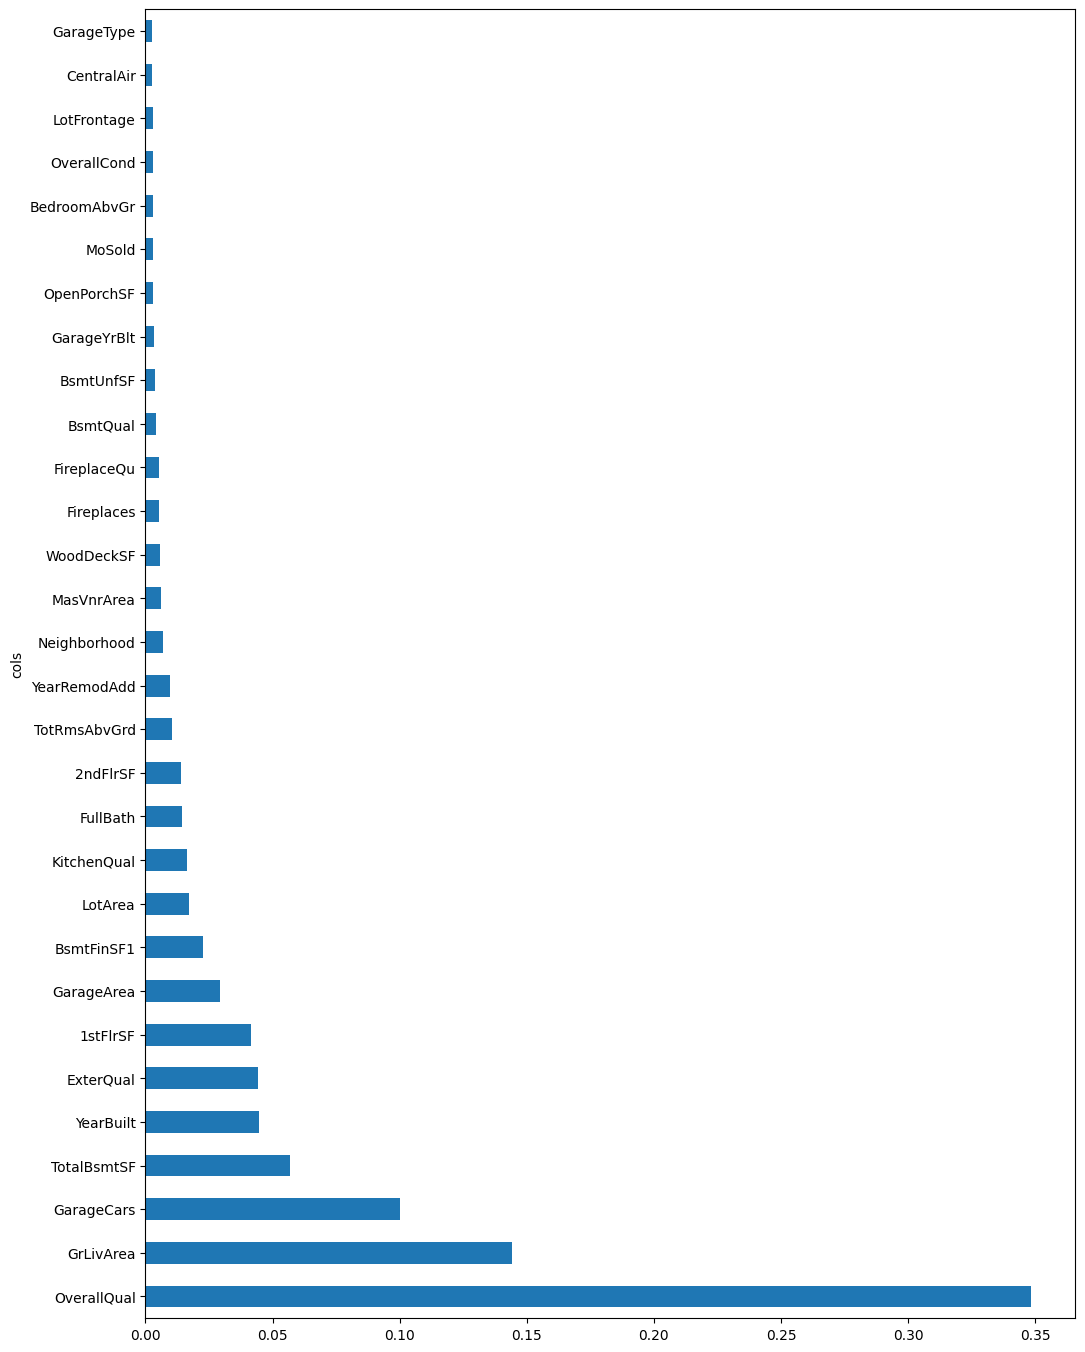

In [103]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,17), legend=False)

plot_fi(fi[:30])

### Removing Low-Importance Variables

In [104]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

20

In [112]:
train_xs_i = train_xs[to_keep]
valid_xs_i = valid_xs[to_keep]

m_i = rf(train_xs_i, train_y, n_estimators=1000, max_samples=1100, max_features=0.7)

In [113]:
m_rmse(m_i, train_xs_i, train_y),m_rmse(m_i, valid_xs_i, valid_y)

(22542.424262, 23912.891999)

In [130]:
import os
os.environ["HTTP_PROXY"] = "http://127.0.0.1:9090"
os.environ["HTTPS_PROXY"] = "http://127.0.0.1:9090"

def predict_and_submit(m, comment="submit"):
    prices = m.predict(test_df[to_keep])
    result = pd.DataFrame({
        'Id': ids,
        'SalePrice': prices
    })
    result.to_csv('submission.csv', index=False)
    kaggle.api.competition_submit(
        'submission.csv', comment, 'house-prices-advanced-regression-techniques')

# Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

<Axes: >

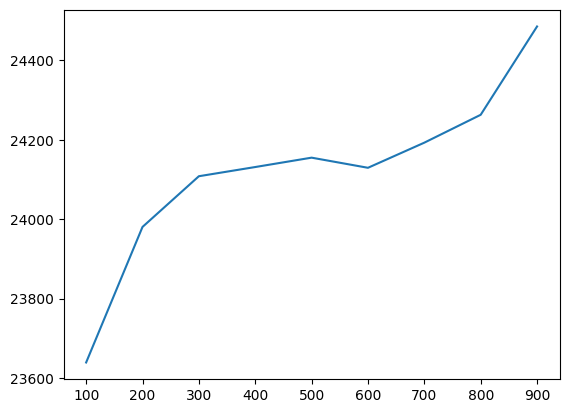

In [ ]:
loss = []
for n in range(100, 1000, 100):
    gbx = GradientBoostingRegressor(n_estimators=n)
    gbx.fit(train_xs_i, train_y)
    loss.append(m_rmse(gbx, valid_xs_i, valid_y))

ls_s = pd.Series(loss, index= range(100, 1000, 100))
ls_s.plot()


<Axes: >

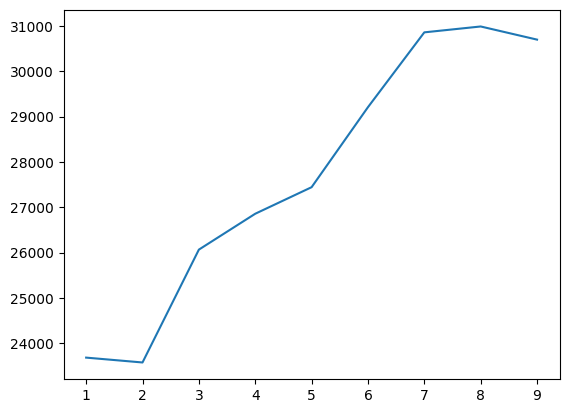

In [151]:
loss = []
for n in range(1, 10):
    gbx = GradientBoostingRegressor(learning_rate=n / 10.)
    gbx.fit(train_xs_i, train_y)
    loss.append(m_rmse(gbx, valid_xs_i, valid_y))

ls_s = pd.Series(loss, index= range(1, 10))
ls_s.plot()

<Axes: >

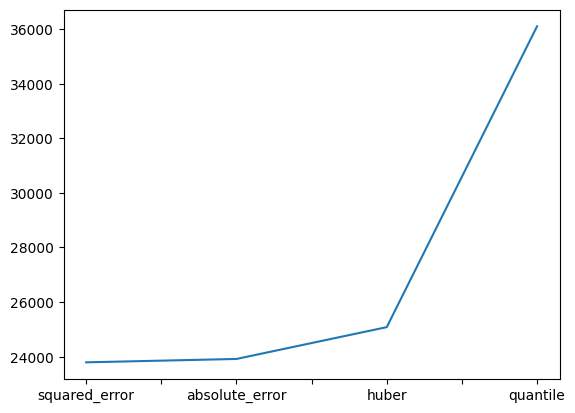

In [152]:
loss = []
ls = ['squared_error', 'absolute_error', 'huber', 'quantile']
for l in ls:
    gbx = GradientBoostingRegressor(loss = l)
    gbx.fit(train_xs_i, train_y)
    loss.append(m_rmse(gbx, valid_xs_i, valid_y))

ls_s = pd.Series(loss, index= ls)
ls_s.plot()

In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2)
gb.fit(train_xs_i, train_y)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [150]:
m_rmse(gb, train_xs_i, train_y), m_rmse(gb, valid_xs_i, valid_y)

(7198.068139, 24342.162075)

In [131]:
predict_and_submit(gb)

100%|██████████| 33.7k/33.7k [00:01<00:00, 33.9kB/s]


# Bagging

In [156]:
def ms_rmse(xs, y, *ms):
    first = []
    for i,v in enumerate(ms): 
        if i == 0:
            first = v.predict(xs)
        else:
            first += v.predict(xs)
    pred = first / len(ms)
    return round(math.sqrt(((pred-y)**2).mean()), 6)

ms_rmse(train_xs_i, train_y, m_i, gb)

13427.156838

In [ ]:
def bagging_predict(xs, *ms):
    first = []
    for i,v in enumerate(ms): 
        if i == 0:
            first = v.predict(xs)
        else:
            first += v.predict(xs)
    return first / len(ms)